In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We load the data and it is immedeatly clear that the columns boat and body contain a lot of NaN values.

In [2]:
#read data into a dataframe
df = pd.read_excel('titanic3.xls')
print(df['boat'].isnull().sum())
print(df['body'].isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'titanic3.xls'

We change the column sex to red hot encoding. The age gets rounded down, this seems the most logical to me, and None values are kept. The columns boat and body are dropped because these have a lot of NaN values thus making them insignificant.

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1 if str(x) == 'female' else x)
# df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
df['age'] = df['age'].apply(lambda x: None if pd.isna(x) else int(x))
df.drop(columns=['boat', 'body'], inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.0,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.0,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,C,NaN


We see a positive correlation between sex and survival.

<AxesSubplot: >

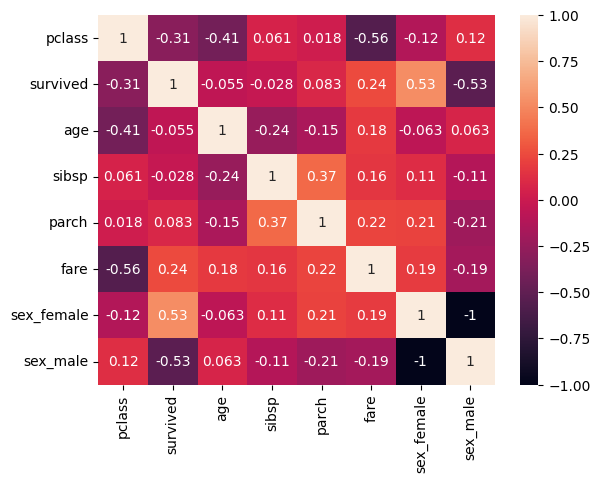

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

We see that there are no more significant correlations other than sex.

In [ ]:
corr['survived'].sort_values(ascending=False)

survived      1.000000
sex_female    0.528693
fare          0.244265
parch         0.082660
sibsp        -0.027825
age          -0.055193
pclass       -0.312469
sex_male     -0.528693
Name: survived, dtype: float64

<AxesSubplot: xlabel='survived', ylabel='age'>

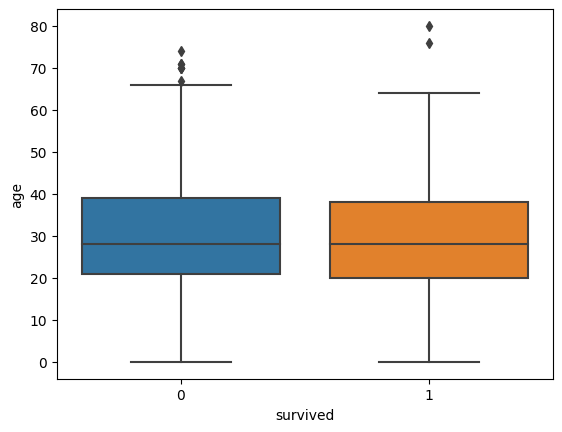

In [ ]:
sns.boxplot(data=df, x='survived', y='age')

We can see that more females survived than males.

In [ ]:
survived_data = df[df['survived'] == 1]

# Create a countplot
sns.countplot(data=survived_data, x='sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.show()

ValueError: Could not interpret input 'sex'

Maybe if we make age categories?

In [ ]:
def age_cat(age):
    if age < 18:
        return 'Child'
    elif 18 < age < 65:
        return 'Adult'
    elif age > 65:
        return 'Elder'
    else:
        return None
    
df['age category'] = df['age'].apply(lambda x: age_cat(x))

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,age category
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,"St Louis, MO",Adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.0,1,0,2665,14.4542,NaN,C,NaN,Child
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,None
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.0,0,0,2656,7.2250,NaN,C,NaN,Adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,C,NaN,Adult


Now if we make a plot which distinguishes the agegroups and survivded.

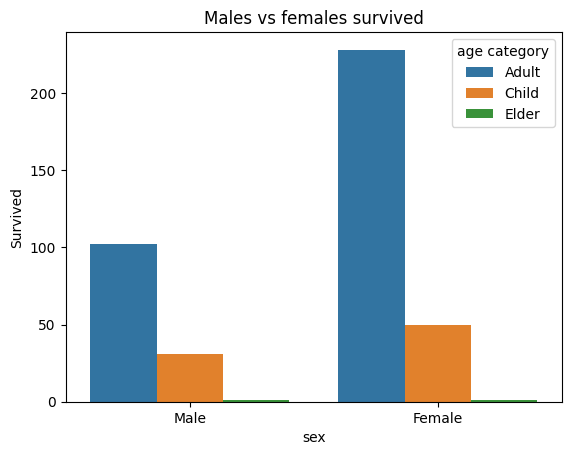

In [ ]:
survived_data = df[df['survived'] == 1]

sns.countplot(data=survived_data, x='sex', hue='age category')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.show()

Survived per social class

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


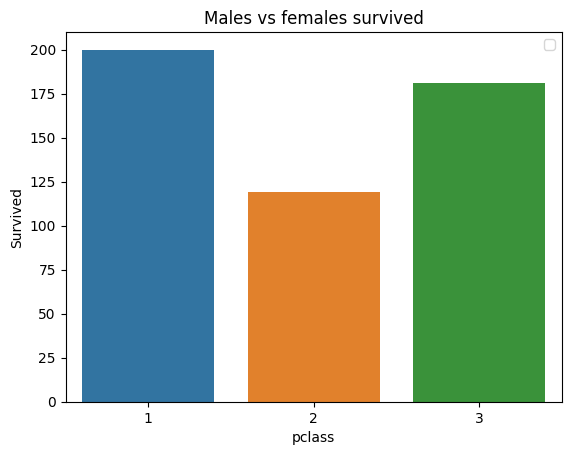

In [ ]:

sns.countplot(data=survived_data, x='pclass')
# plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survived')
plt.title('Males vs females survived')
plt.legend()
plt.show()